In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('machine_3.csv')

In [32]:
data

,id,core_cur_work_time,ch_tot_work_time,ch_status,ch_mode,progr_progress,prog,has_error,timestamp
0,47,148:28:26,332:0:5,Работа,Авто,32,/NC/examples/08_01.nc,0,2023-11-21 22:41:13
1,48,148:28:29,332:0:8,Работа,Авто,47,/NC/examples/08_01.nc,0,2023-11-21 22:41:16
2,49,148:28:31,332:0:10,Работа,Авто,47,/NC/examples/08_01.nc,0,2023-11-21 22:41:19
3,50,148:28:35,332:0:14,Работа,Авто,47,/NC/examples/08_01.nc,0,2023-11-21 22:41:22
4,51,148:28:38,332:0:17,Работа,Авто,47,/NC/examples/08_01.nc,0,2023-11-21 22:41:25
...,...,...,...,...,...,...,...,...,...
7492,7539,154:55:1,337:19:14,Работа,Авто,99,/NC/examples/06_07.nc,0,2023-11-22 05:07:48
7493,7540,154:55:4,337:19:14,Останов,Авто,100,NaN,0,2023-11-22 05:07:51
7494,7541,154:55:7,337:19:14,Останов,Авто,100,NaN,0,2023-11-22 05:07:54
7495,7542,154:55:10,337:19:14,Останов,Авто,100,NaN,0,2023-11-22 05:07:57


In [37]:
df = data.drop(['id','timestamp'], axis=1)

In [40]:
df = df.drop_duplicates()

In [41]:
df

,core_cur_work_time,ch_tot_work_time,ch_status,ch_mode,progr_progress,prog,has_error
0,148:28:26,332:0:5,Работа,Авто,32,/NC/examples/08_01.nc,0
1,148:28:29,332:0:8,Работа,Авто,47,/NC/examples/08_01.nc,0
2,148:28:31,332:0:10,Работа,Авто,47,/NC/examples/08_01.nc,0
3,148:28:35,332:0:14,Работа,Авто,47,/NC/examples/08_01.nc,0
4,148:28:38,332:0:17,Работа,Авто,47,/NC/examples/08_01.nc,0
...,...,...,...,...,...,...,...
7491,154:54:58,337:19:13,Готов,Авто,100,NaN,0
7492,154:55:1,337:19:14,Работа,Авто,99,/NC/examples/06_07.nc,0
7493,154:55:4,337:19:14,Останов,Авто,100,NaN,0
7494,154:55:7,337:19:14,Останов,Авто,100,NaN,0


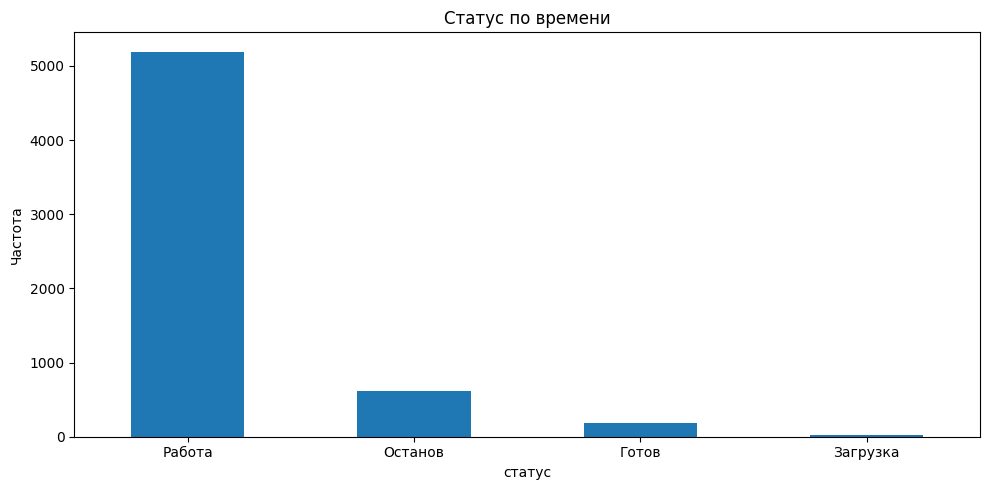

In [52]:
status_counts = df['ch_status'].value_counts()
most_common_status = status_counts.idxmax()

plt.figure(figsize=(10, 5))
status_counts.plot(kind='bar')
plt.title('Статус по времени')
plt.xlabel('статус')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
program_counts = df['prog'].value_counts()
most_common_program = program_counts.idxmax()

In [50]:
most_common_program

'/NC/examples/05_17.nc'

In [46]:
mode_counts = df['ch_mode'].value_counts()
most_common_mode = mode_counts.idxmax()

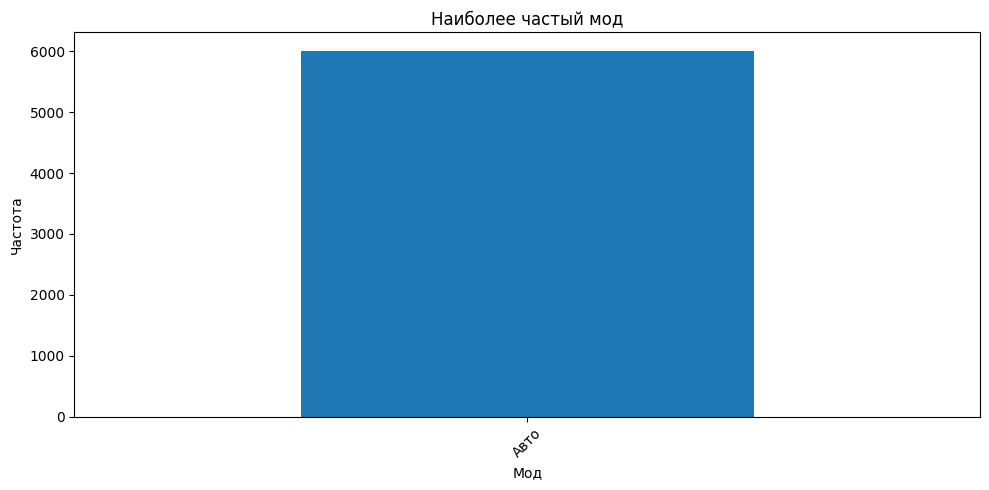

In [51]:
plt.figure(figsize=(10, 5))
mode_counts.plot(kind='bar')
plt.title('Наиболее частый мод')
plt.xlabel('Мод')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
online_count = (df['ch_status'] == 'Работа').sum()
offline_count = (df['ch_status'] == 'Останов').sum()

In [56]:
online_count/60

86.56666666666666

In [57]:
offline_count/60

10.3

In [58]:
df[df['has_error'] == 1]

,core_cur_work_time,ch_tot_work_time,ch_status,ch_mode,progr_progress,prog,has_error
